In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import csv
import requests
from bs4 import BeautifulSoup
import requests

In [2]:
# Link to Data Used = https://github.com/nytimes/covid-19-data

In [3]:
# Let's try to take out the download step by using requests

url = 'https://github.com/nytimes/covid-19-data/blob/master/us-states.csv'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find("table", {"class":"js-csv-data"})

total_us_data = pd.read_html(str(table))[0]

total_us_data.drop(columns='Unnamed: 0', inplace=True)

total_us_data.to_csv('most_recent_data.csv')

In [4]:
# Always have at least one of these marked out
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-27.csv').drop(columns='Unnamed: 0')

In [5]:
# let's give the data a look
total_us_data.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [6]:
# Let's check for nulls
total_us_data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [7]:
# Let's check on the different states
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

### Let's Check on and Add Some Data

In [8]:
# Date isn't DateTime Yet
total_us_data.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [9]:
# Fixed it
total_us_data['date'] = pd.to_datetime(total_us_data['date'])

In [10]:
# Took me a few days, but I figured out how to do pct_change with groupby
# This will show the percent change in cases by day
total_us_data['percent_change'] = total_us_data.groupby('state').cases.pct_change()
total_us_data['percent_change'].fillna(0, inplace=True)

In [11]:
# Let's add a difference column
total_us_data['change_in_cases'] = total_us_data.groupby('state')['cases'].diff()

In [12]:
# Looks good
total_us_data.head()

date       state  fips  cases  deaths  percent_change  change_in_cases
0 2020-01-21  Washington    53      1       0             0.0              NaN
1 2020-01-22  Washington    53      1       0             0.0              0.0
2 2020-01-23  Washington    53      1       0             0.0              0.0
3 2020-01-24    Illinois    17      1       0             0.0              NaN
4 2020-01-24  Washington    53      1       0             0.0              0.0

In [13]:
# Let's read this in to make the graphs easier
state_action = pd.read_csv('state_action.csv')
state_action = state_action.set_index('state')

In [14]:
# And let's convert these back to datetime
state_action.state_of_emergency = pd.to_datetime(state_action.state_of_emergency)
state_action.stay_at_home = pd.to_datetime(state_action.stay_at_home)

### Separating the Data by State

In [15]:
# Let's make a funciton to seperate these
def state_info(state):
    data = total_us_data[total_us_data.state == state]
    data.date = pd.to_datetime(data.date)
    data = data.set_index(data.date)
#     data['percent_change'] = data.cases.pct_change()
#     data.percent_change.fillna(0, inplace=True)
    return data.drop(labels='date', axis=1)

In [16]:
# Function Test
state_info('Northern Mariana Islands').head()

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


state  fips  cases  deaths  percent_change  \
date                                                                        
2020-03-28  Northern Mariana Islands    69      2       0             0.0   
2020-03-29  Northern Mariana Islands    69      2       0             0.0   
2020-03-30  Northern Mariana Islands    69      2       0             0.0   
2020-03-31  Northern Mariana Islands    69      2       0             0.0   
2020-04-01  Northern Mariana Islands    69      6       1             2.0   

            change_in_cases  
date                         
2020-03-28              NaN  
2020-03-29              0.0  
2020-03-30              0.0  
2020-03-31              0.0  
2020-04-01              4.0

In [17]:
# Don't know how to make a function to do this, so here we go
washington_data = state_info('Washington')
illinois_data = state_info('Illinois')
california_data = state_info('California')
arizona_data = state_info('Arizona')
massachusetts_data = state_info('Massachusetts')
wisconsin_data = state_info('Wisconsin')
texas_data = state_info('Texas')
nebraska_data = state_info('Nebraska')
utah_data = state_info('Utah')
oregon_data = state_info('Oregon')
florida_data = state_info('Florida')
new_york_data = state_info('New York')
rhode_island_data = state_info('Rhode Island')
georgia_data = state_info('Georgia')
new_hampshire_data = state_info('New Hampshire')
north_carolina_data = state_info('North Carolina')
new_jersey_data = state_info('New Jersey')
colorado_data = state_info('Colorado')
maryland_data = state_info('Maryland')
nevada_data = state_info('Nevada')
tennessee_data = state_info('Tennessee')
hawaii_data = state_info('Hawaii')
indiana_data = state_info('Indiana')
kentucky_data = state_info('Kentucky')
minnesota_data = state_info('Minnesota')
oklahoma_data = state_info('Oklahoma')
pennsylvania_data = state_info('Pennsylvania')
south_carolina_data = state_info('South Carolina')
dc_data = state_info('District of Columbia')
kansas_data = state_info('Kansas')
missouri_data = state_info('Missouri')
vermont_data = state_info('Vermont')
virginia_data = state_info('Virginia')
connecticut_data = state_info('Connecticut')
iowa_data = state_info('Connecticut')
louisiana_data = state_info('Louisiana')
ohio_data = state_info('Ohio')
michigan_data = state_info('Michigan')
south_dakota_data = state_info('South Dakota')
arkansas_data = state_info('Arkansas')
delaware_data = state_info('Delaware')
mississippi_data = state_info('Mississippi')
new_mexico_data = state_info('New Mexico')
north_dakota_data = state_info('North Dakota')
wyoming_data = state_info('Wyoming')
alaska_data = state_info('Alaska')
maine_data = state_info('Maine')
alabama_data = state_info('Alabama')
idaho_data = state_info('Idaho')
montana_data = state_info('Montana')
puerto_rico_data = state_info('Puerto Rico')
virgin_islands_data = state_info('Virgin Islands')
guam_data = state_info('Guam')
west_virginia_data = state_info('West Virginia')
north_mariana_islands_data = state_info('Northern Mariana Islands')
american_samoa_data = state_info('American Samoa')

In [18]:
# Changing the Pandas Settings Real Quick
pd.options.display.min_rows = 50

In [19]:
pd.options.display.min_rows

50

# Function That Makes The Graphs

In [20]:
# This will be the main graph funciton
def daily_change(state, title=None, state_of_emergency_declaration=None, stay_at_home_order=None, end_of_stay_at_home=None, easter=None):
    plt.figure(figsize=(16, 9))
    
    if title == None:
        plt.title(label=f"{state.state[0]} Currently Has {state.cases[-1]} Cases In Total", size=24)
    else:
        plt.title(title, size=24)
    
    plt.plot(state.change_in_cases)
    
    state_of_emergency = state_action.state_of_emergency[state.state[0]]
    stay_at_home = state_action.stay_at_home[state.state[0]]
    week = dt.timedelta(days=7)
    
    # This adds the State of Emergency Declaration Date
    if state_of_emergency_declaration != None:
        if not pd.isna(state_of_emergency):
            plt.vlines(x=state_of_emergency, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='purple', label='State of Emergency Declaration')
            plt.vlines(x=state_of_emergency+week, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='purple', label='One Week After State of Emergency')
    
    # This add's the Stay at Home Order Date
    # The if not is to weed out states with no Stay at Home Orders
    if stay_at_home_order != None:
        if not pd.isna(stay_at_home):
            plt.vlines(x=state_action.stay_at_home[state.state[0]], ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='green', label='Stay At Home Order Enacted')
            plt.vlines(x=state_action.stay_at_home[state.state[0]]+week, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='green', label='One Week After Stay At Home')
    
    # Since Georgia and Texas are lifting their Stay at Home Orders, I have ot stay adding this
    if end_of_stay_at_home != None:
        plt.vlines(x=end_of_stay_at_home, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='red', label='End of Stay At Home Order')
        plt.vlines(x=end_of_stay_at_home+week, ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='red', label='One Week After End of Stay At Home')
    
    
    # This adds Easter's markers, so it will noramally not be used
    if easter != None:
        plt.vlines(x=dt.date(2020, 4, 12), ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='gold', label='Easter Sunday')
        plt.vlines(x=dt.date(2020, 4, 19), ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='gold', label='One Week After Easter')
    
    
    # This adds the 4th of July's markers
    plt.vlines(x=dt.date(2020, 7, 4), ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyles='solid', color='navy', label='4th of July')
    plt.vlines(x=dt.date(2020, 7, 11), ymin=state.change_in_cases.min(), ymax=state.change_in_cases.max(), linestyle='dashdot', color='navy', label='One Week After the 4th')
    
    
    # This will add text at the end of the line indicating the current number of cases
    plt.text(x=state.index[-1], y=(state.change_in_cases[-1]), s=f"{int(state.change_in_cases[-1])}\nNew\nCases", fontsize=10)
    # ^ Marking this out for now because no one line of code looks good for every state ^
    
    # Hopefully this auto goes to the best corner
    plt.legend()

# Let's Make Some Depressing Graphs

## Alabama (AL)

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


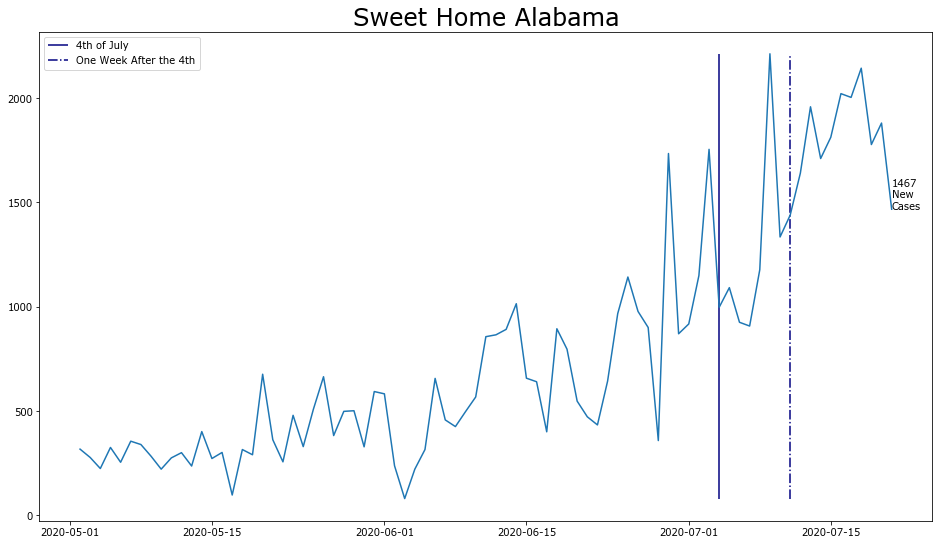

In [21]:
daily_change(alabama_data[50:], 'Sweet Home Alabama')

## Alaska (AK)

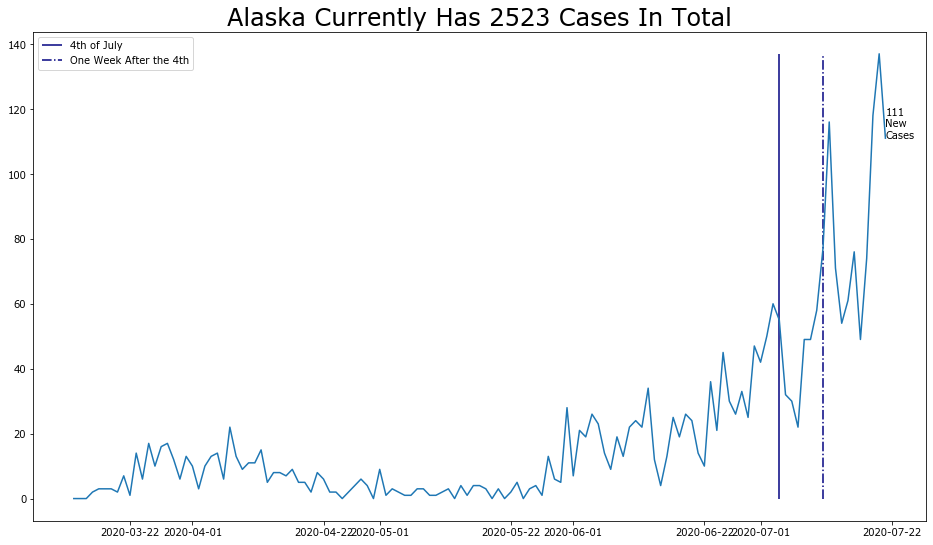

In [22]:
daily_change(alaska_data)

## American Samoa (AS)

In [23]:
# daily_change(american_samoa_data)

## Arizona (AZ)

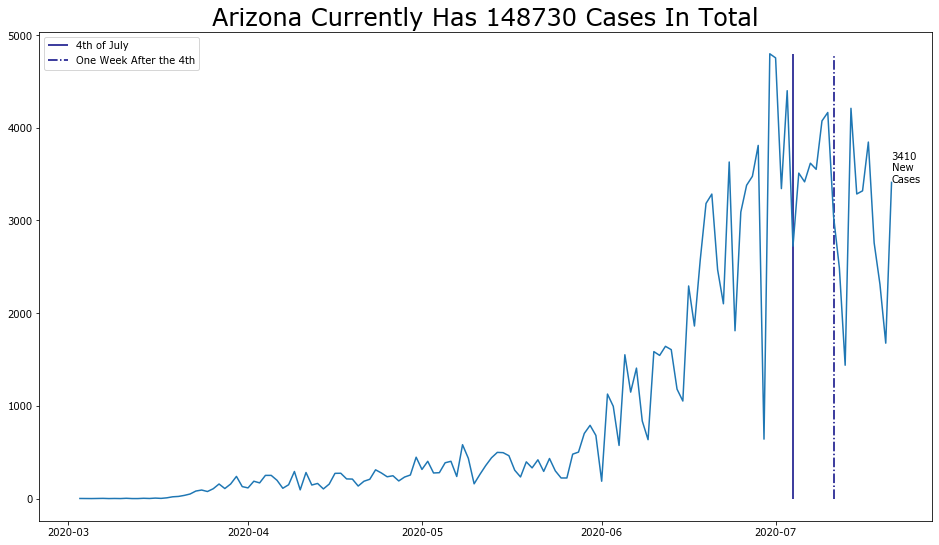

In [24]:
daily_change(arizona_data[37:])

## Arkansas (AR)

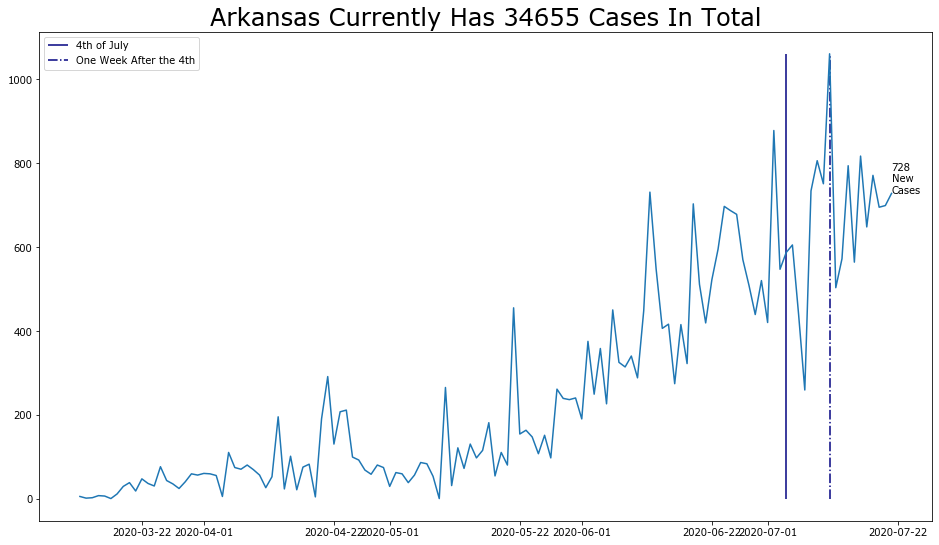

In [25]:
daily_change(arkansas_data)

## California (CA)

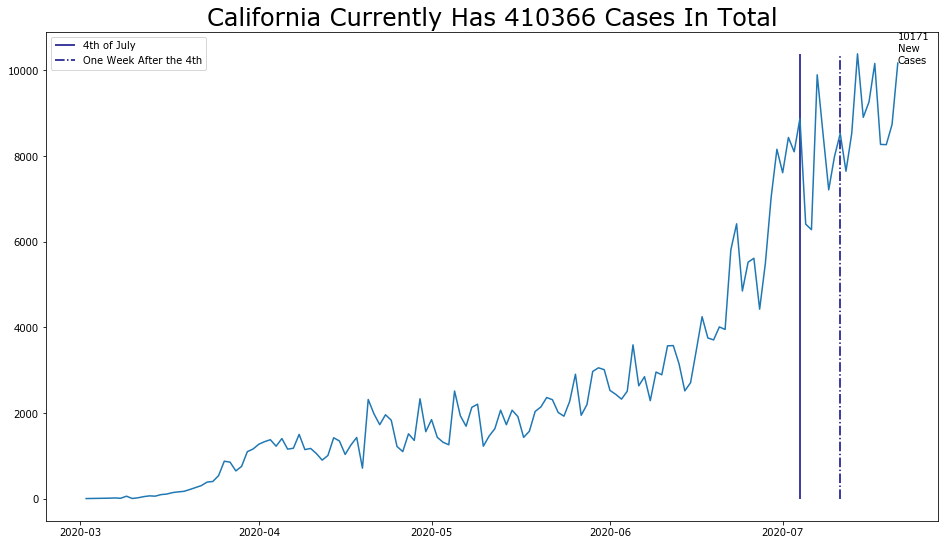

In [26]:
daily_change(california_data[37:])

## Colorado (CO)

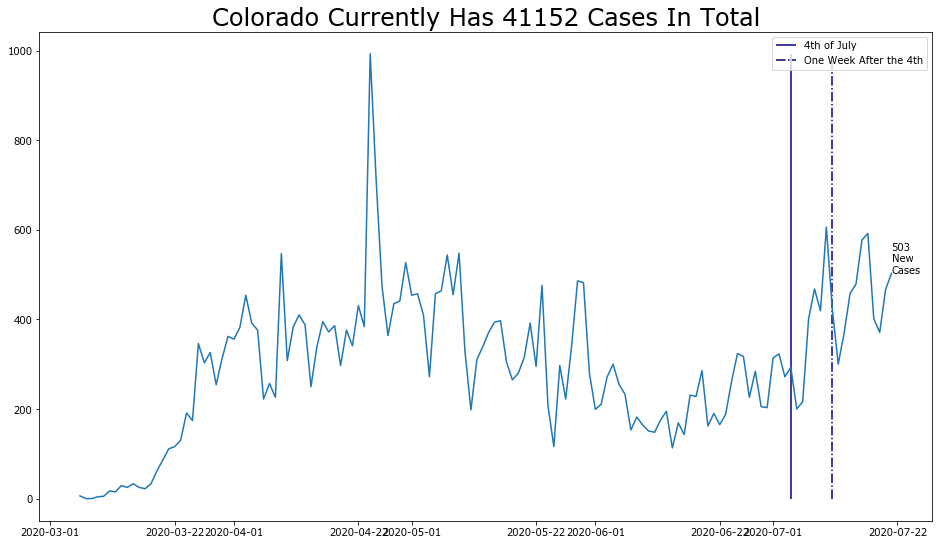

In [27]:
daily_change(colorado_data)

## Connecticut (CT)

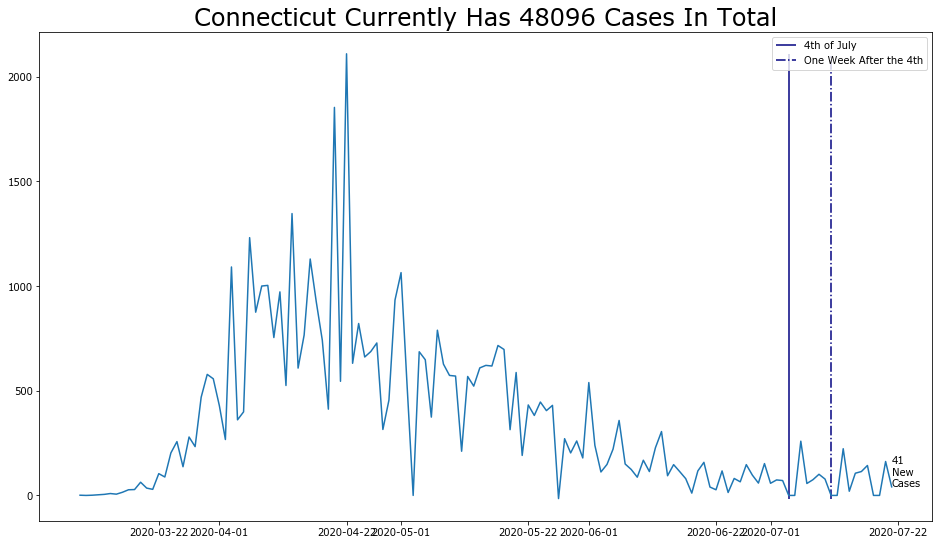

In [28]:
daily_change(connecticut_data)

## Delaware (DE)

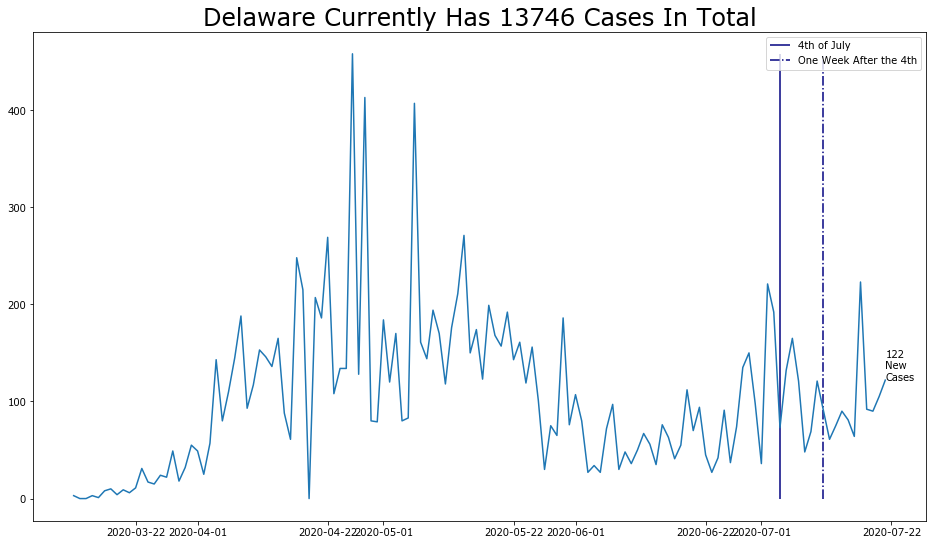

In [29]:
daily_change(delaware_data)

## District of Columbia (DC)

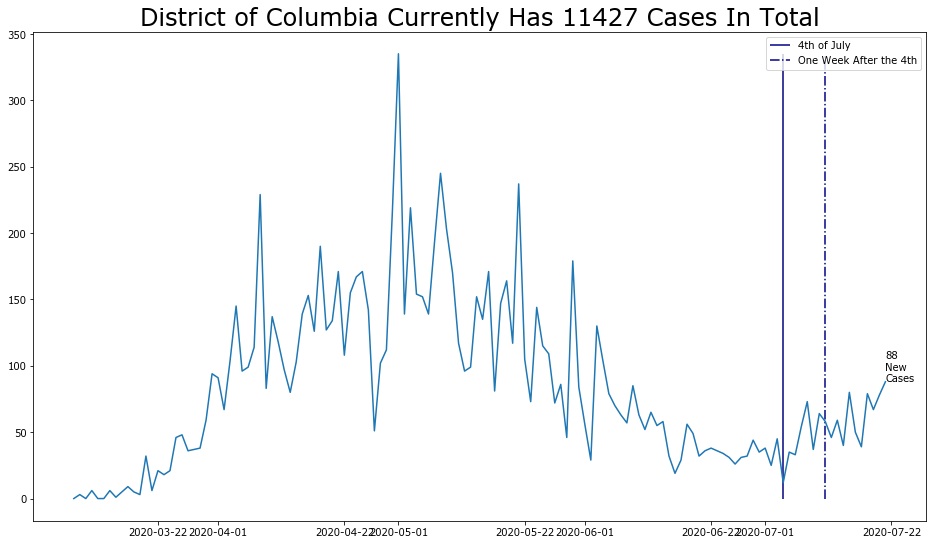

In [30]:
daily_change(dc_data)

## Florida (FL)

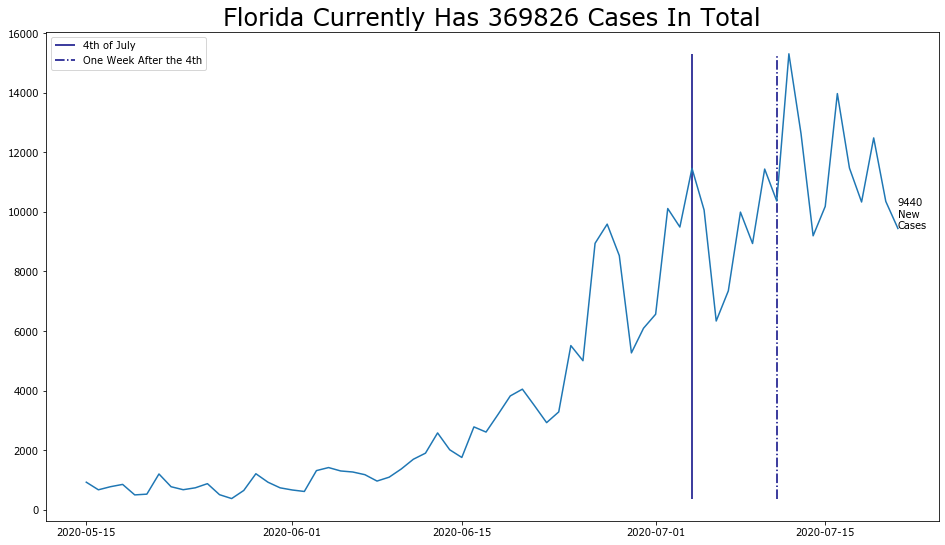

In [87]:
daily_change(florida_data[dt.date(2020, 5, 15):])

## Georgia (GA)

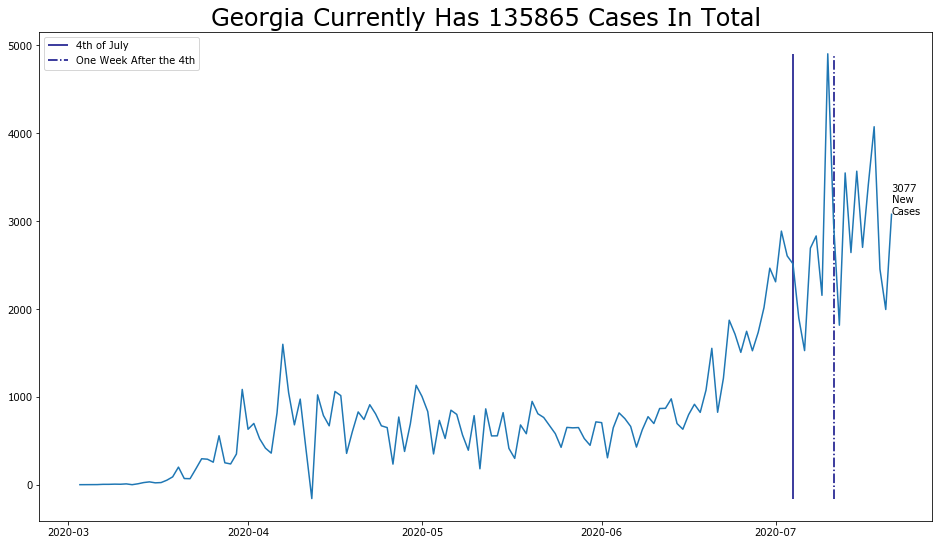

In [32]:
daily_change(georgia_data)

# https://thehill.com/homenews/state-watch/495527-georgia-to-lift-stay-at-home-order-for-most-residents-friday

## Guam (GU)

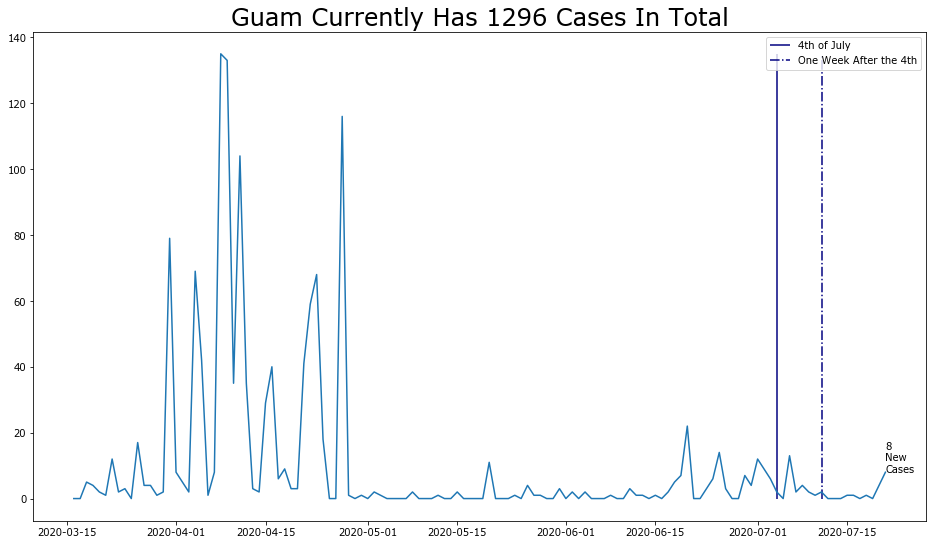

In [33]:
daily_change(guam_data)

## Hawaii (HI)

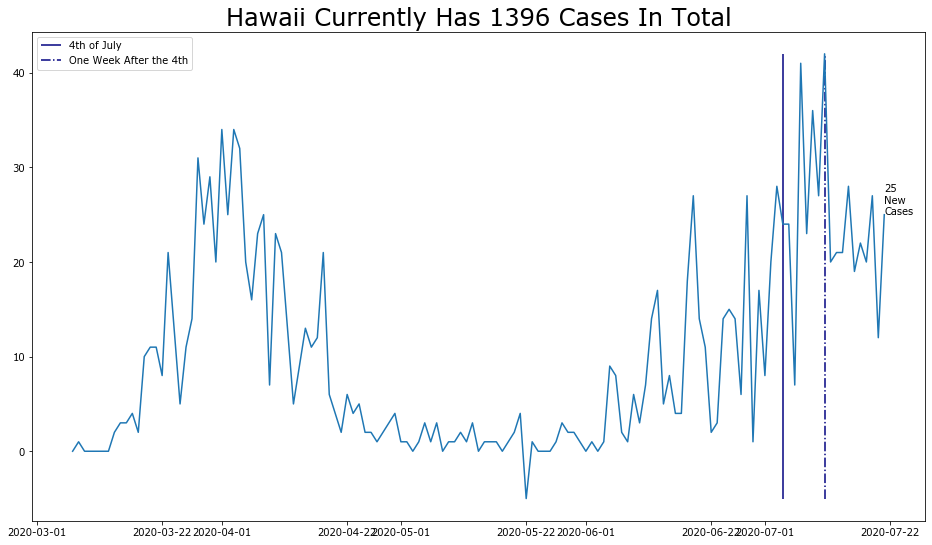

In [34]:
daily_change(hawaii_data)

## Idaho (ID)

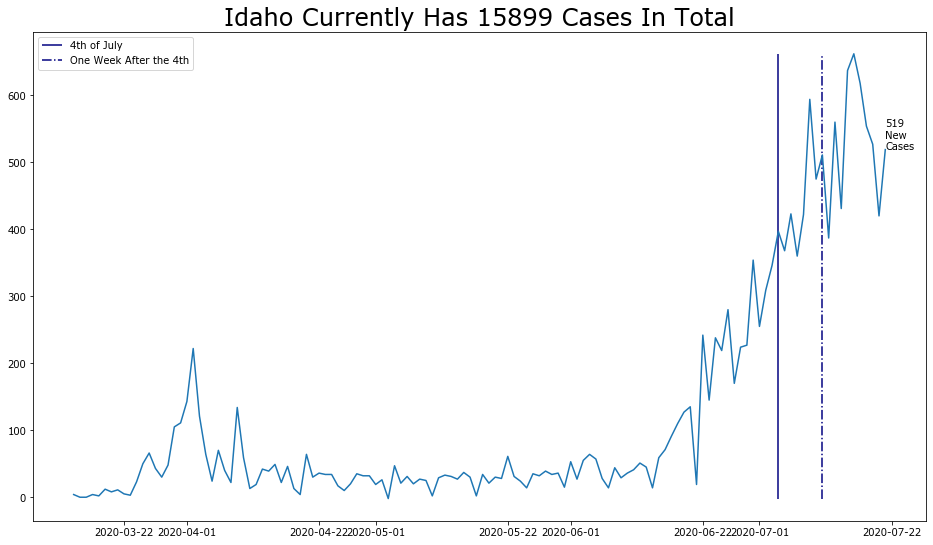

In [35]:
daily_change(idaho_data)

## Illinois (IL)

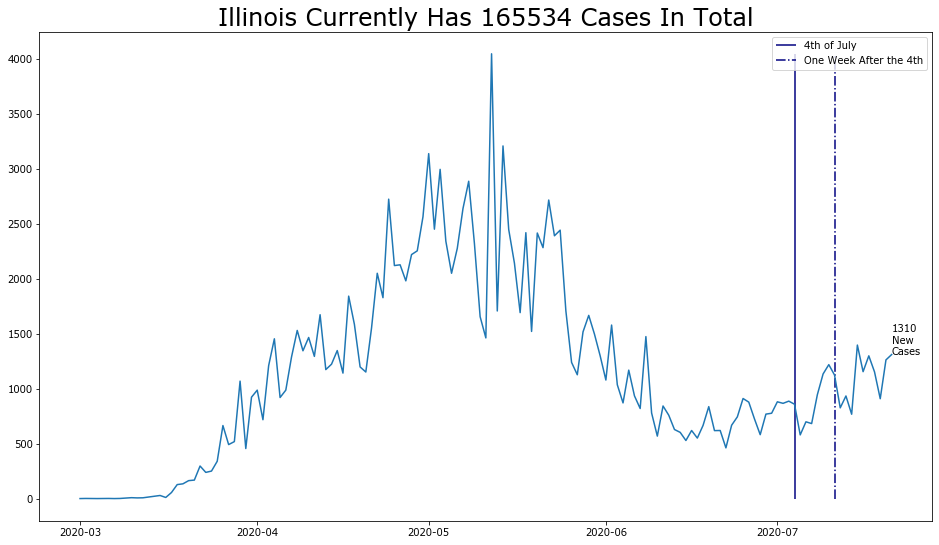

In [36]:
daily_change(illinois_data[37:])

## Indiana (IN)

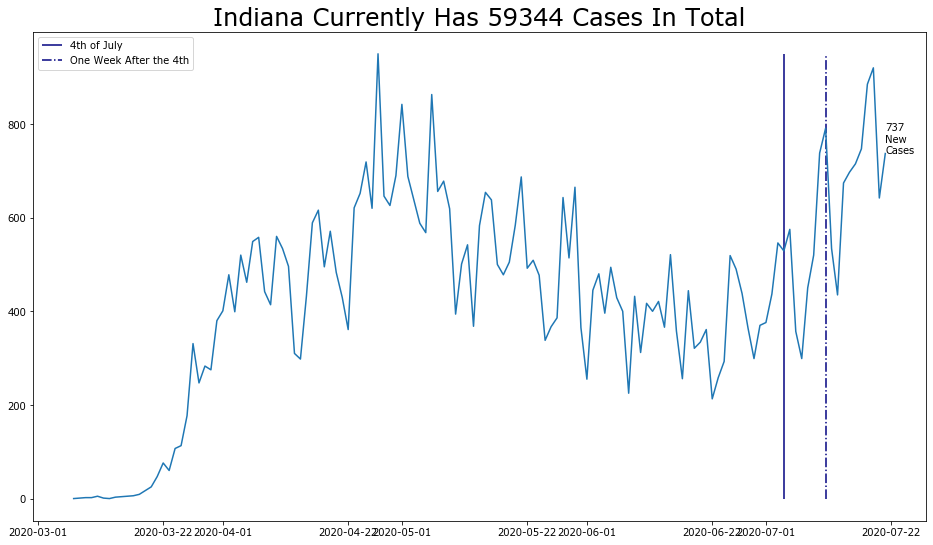

In [37]:
daily_change(indiana_data)

## Iowa (IA)

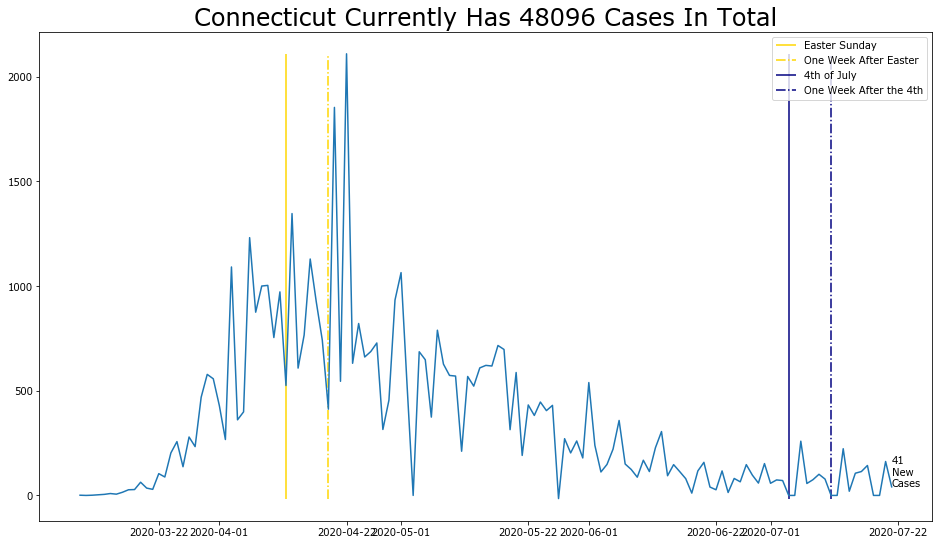

In [38]:
daily_change(iowa_data, easter="Bad")

## Kansas (KS)

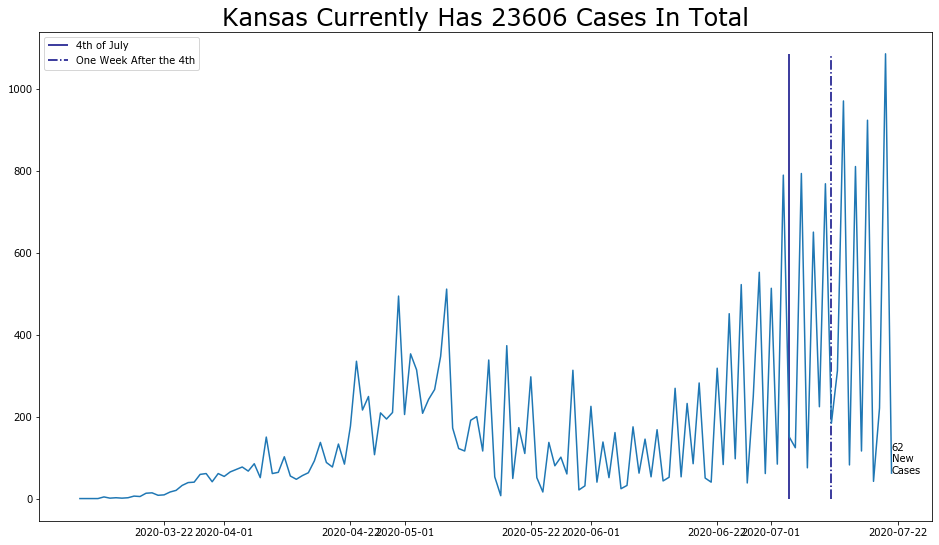

In [39]:
daily_change(kansas_data)

## Kentucky (KY)

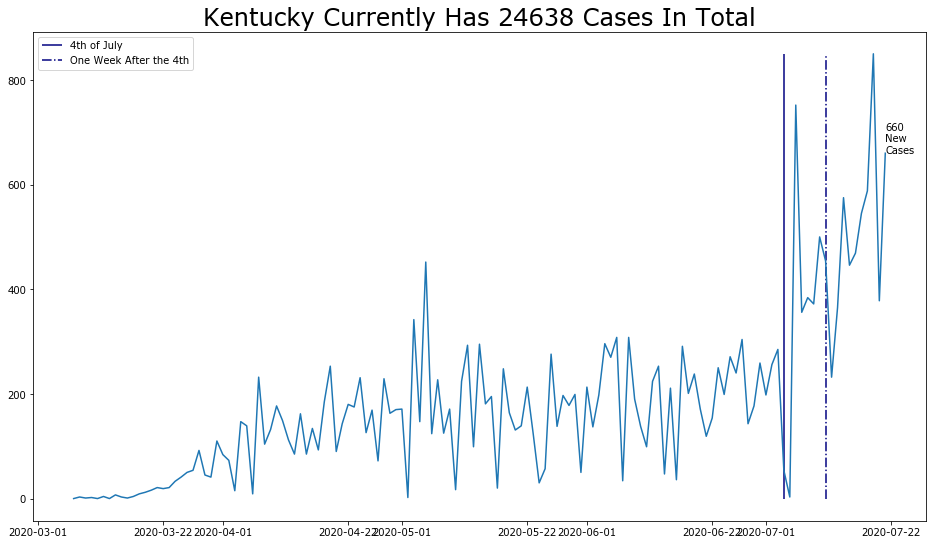

In [40]:
daily_change(kentucky_data)

## Louisiana (LA)

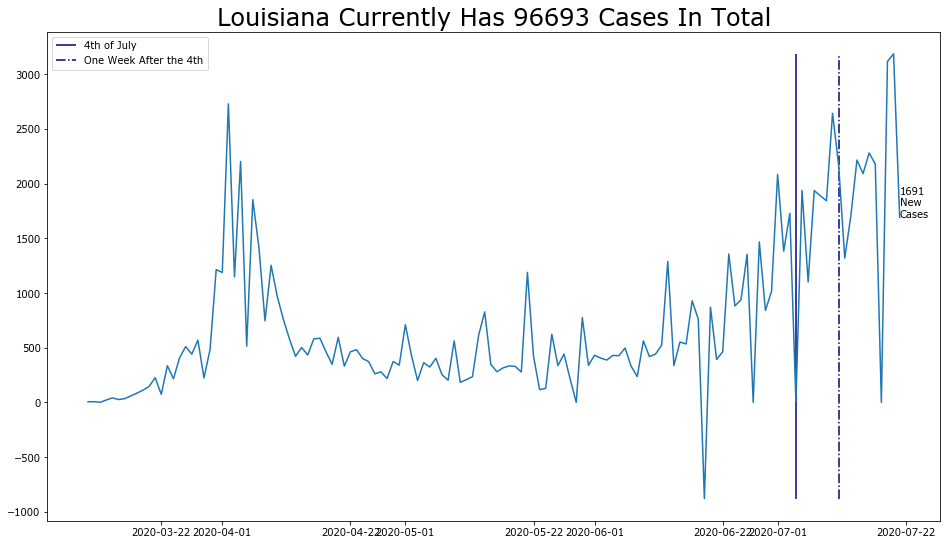

In [41]:
daily_change(louisiana_data)

## Maine (ME)

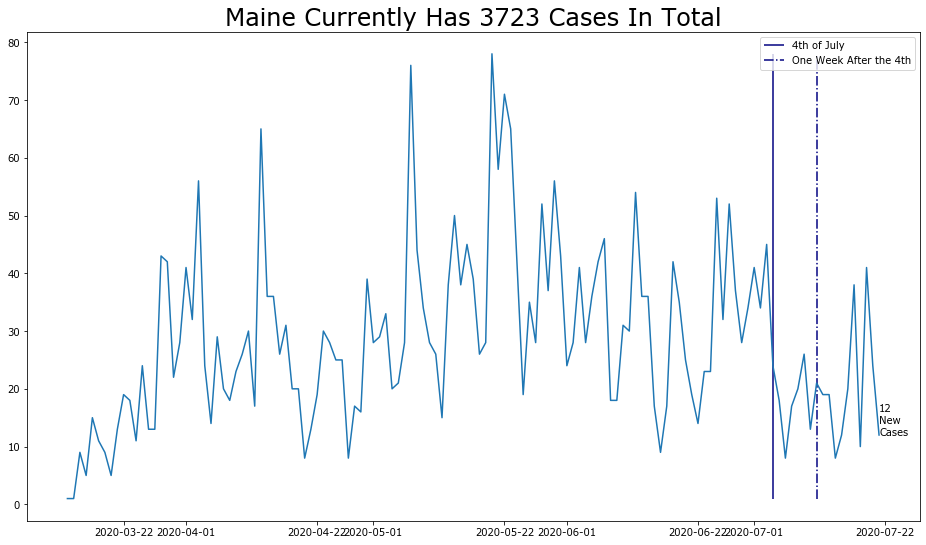

In [42]:
daily_change(maine_data)

## Maryland (MD)

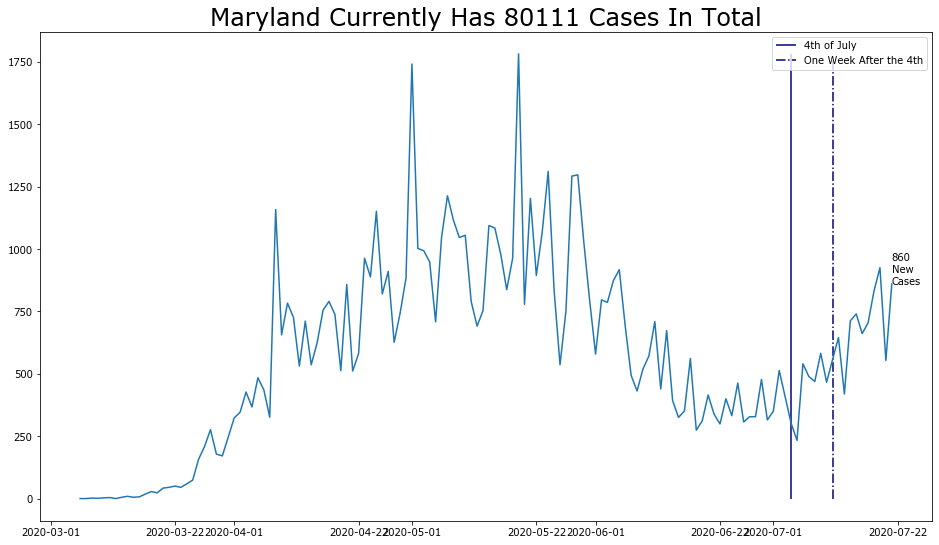

In [43]:
daily_change(maryland_data)

## Massachusetts (MA)

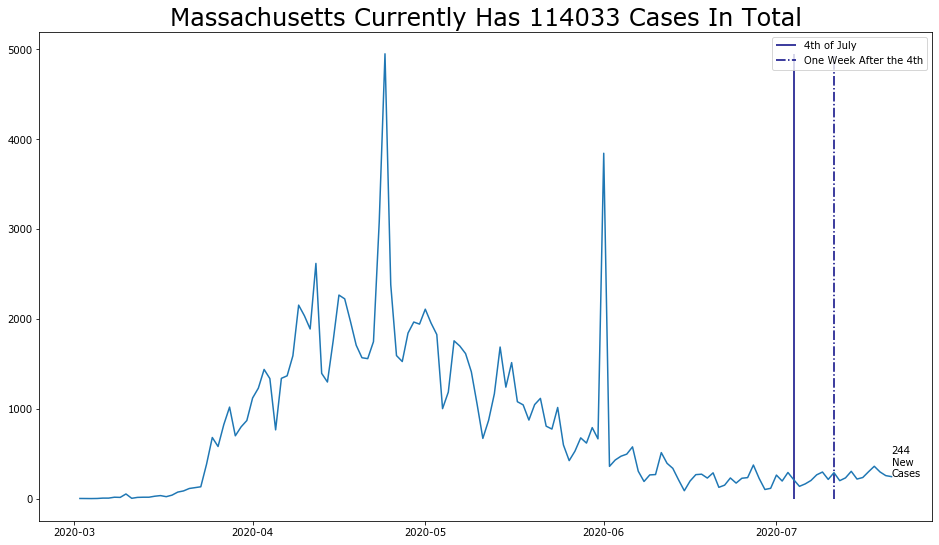

In [44]:
daily_change(massachusetts_data[30:])

# Patriots' Day is a local holiday in the state that would usually have a marathon happening during it
# plt.vlines(x=dt.date(2020, 4, 18), ymin=massachusetts_data.change_in_cases.min(), ymax=massachusetts_data.change_in_cases.max(), label="Begining of Patriots' Day Weekend", color='red')
# plt.vlines(x=dt.date(2020, 4, 25), ymin=massachusetts_data.change_in_cases.min(), ymax=massachusetts_data.change_in_cases.max(), label="One Week After Begining of Patriots' Day Weekend", color='red', linestyle='dashdot')

# plt.legend()

## Michigan (MI)

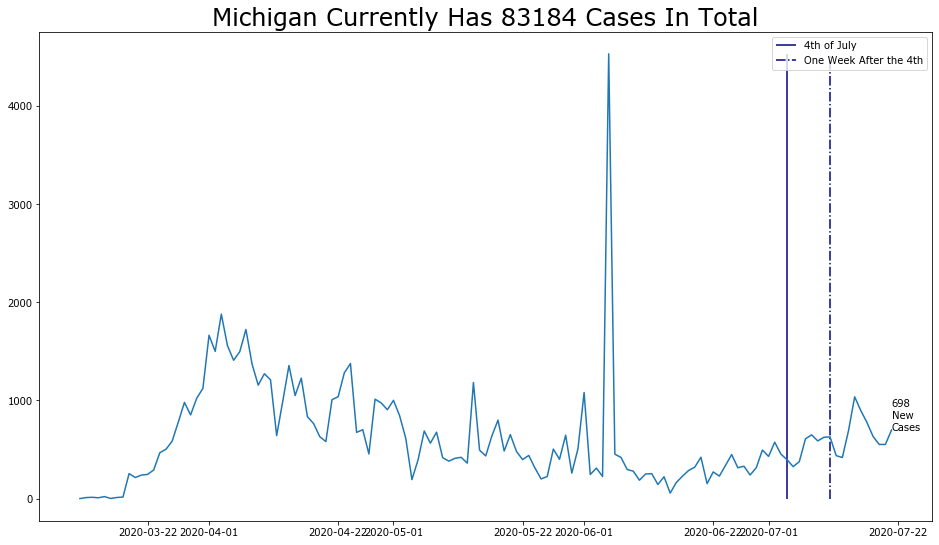

In [45]:
daily_change(michigan_data)

## Minnesota (MN)

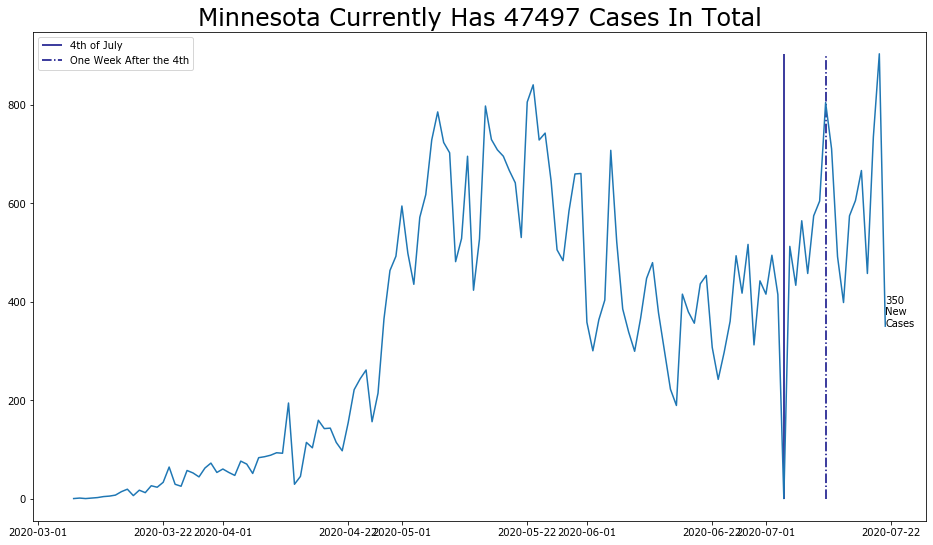

In [46]:
daily_change(minnesota_data)

## Mississippi (MS)

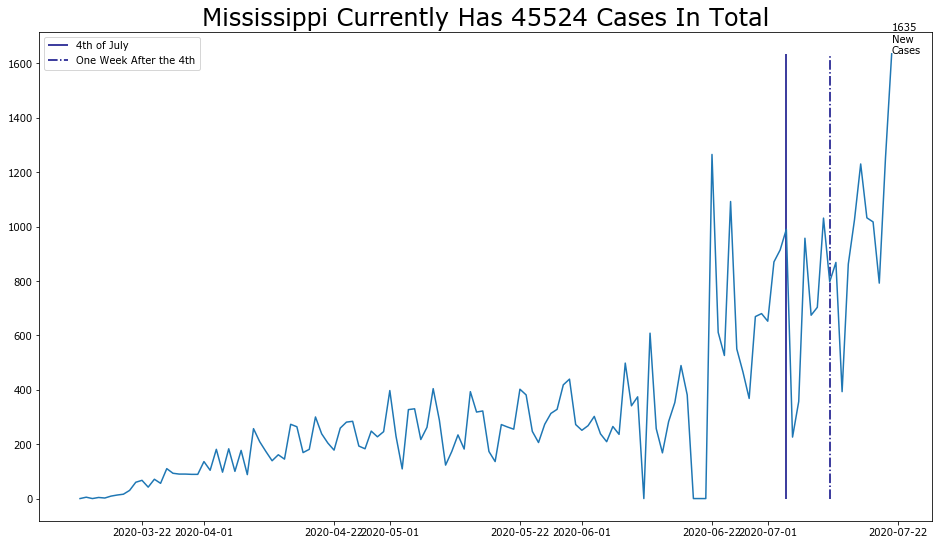

In [47]:
daily_change(mississippi_data)

## Missouri (MO)

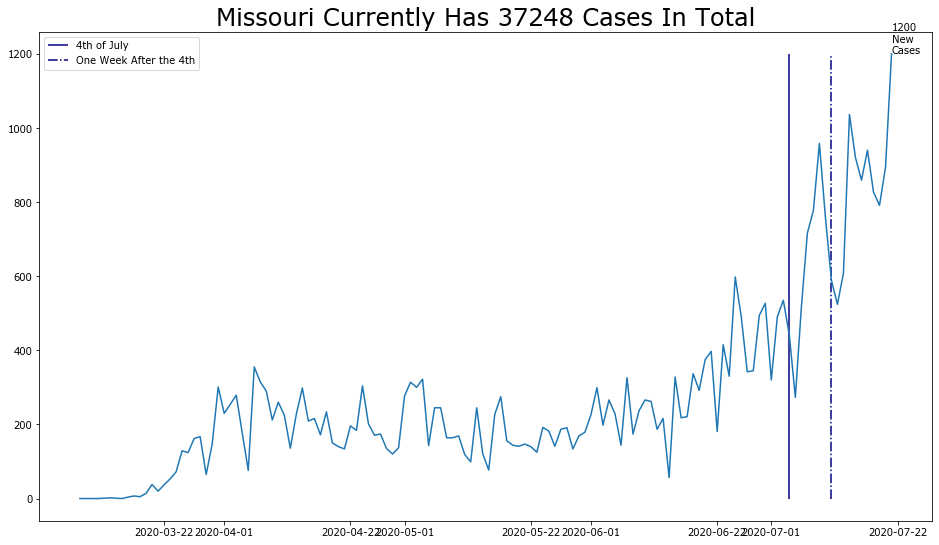

In [48]:
daily_change(missouri_data)

## Montana (MT)

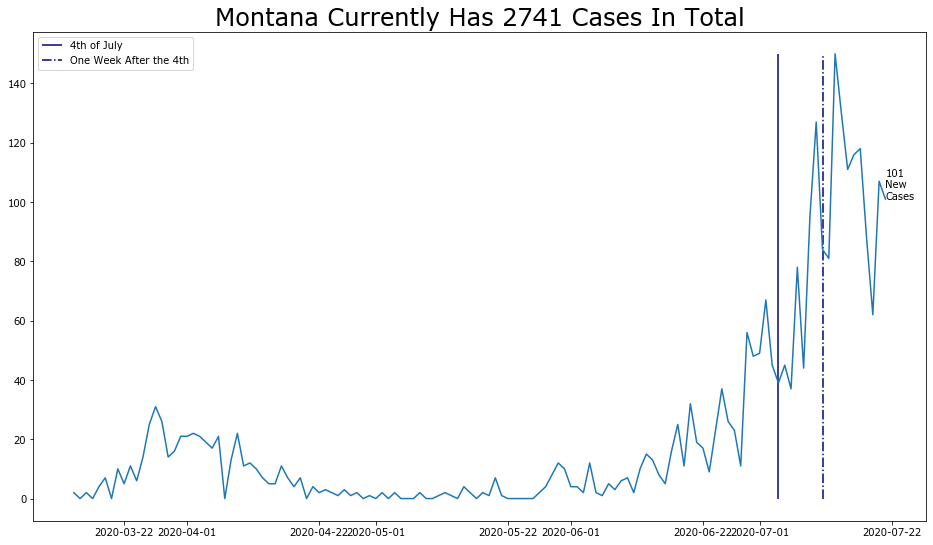

In [49]:
daily_change(montana_data)

## Nebraska (NE)

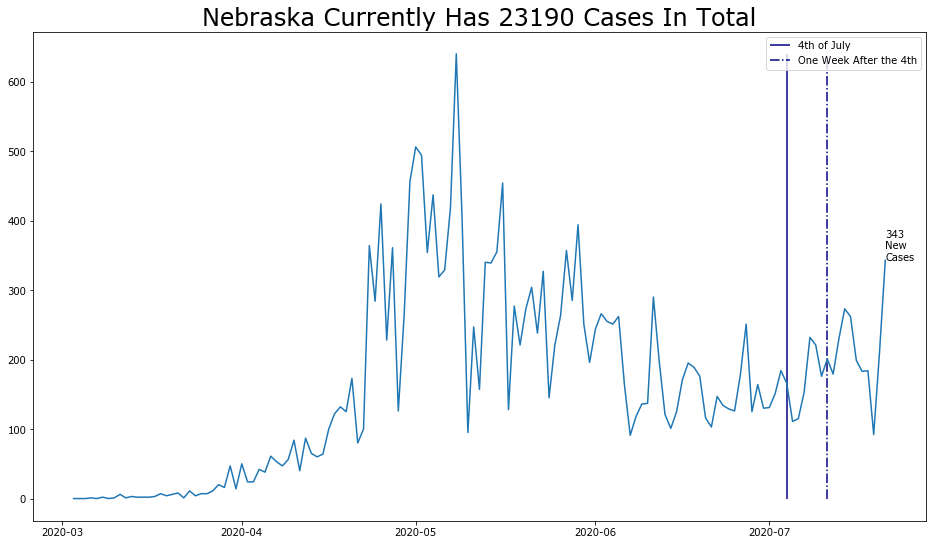

In [50]:
daily_change(nebraska_data[15:])

## Nevada (NV)

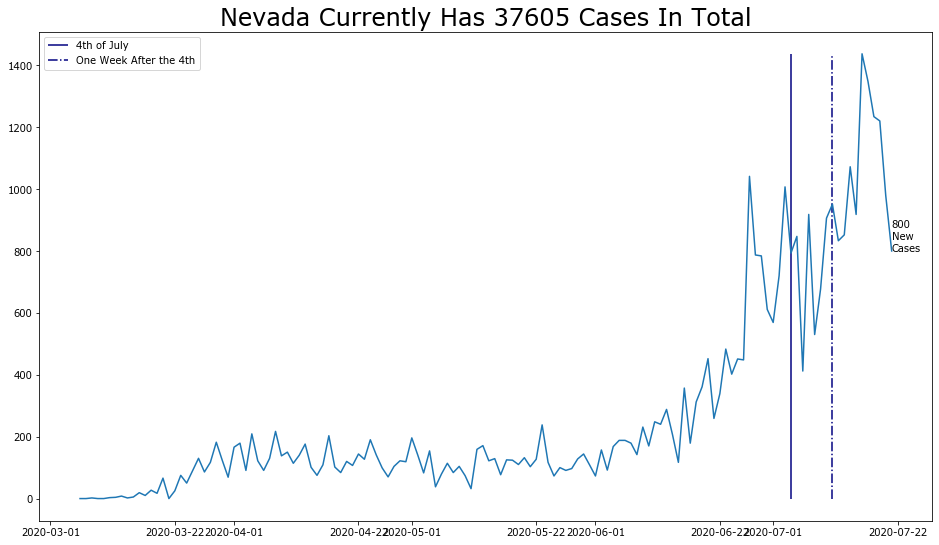

In [51]:
daily_change(nevada_data)

## New Hampshire (NH)

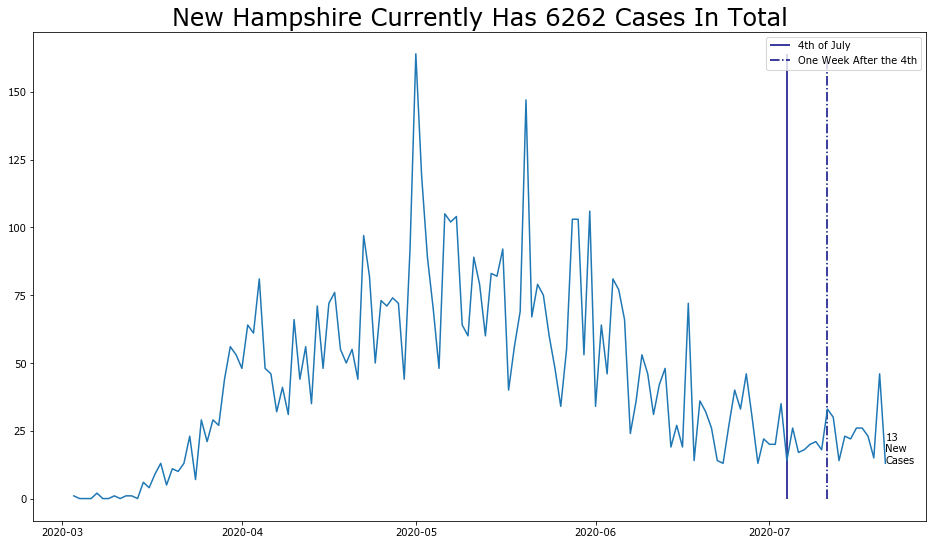

In [52]:
daily_change(new_hampshire_data)

## New Jersey (NJ)

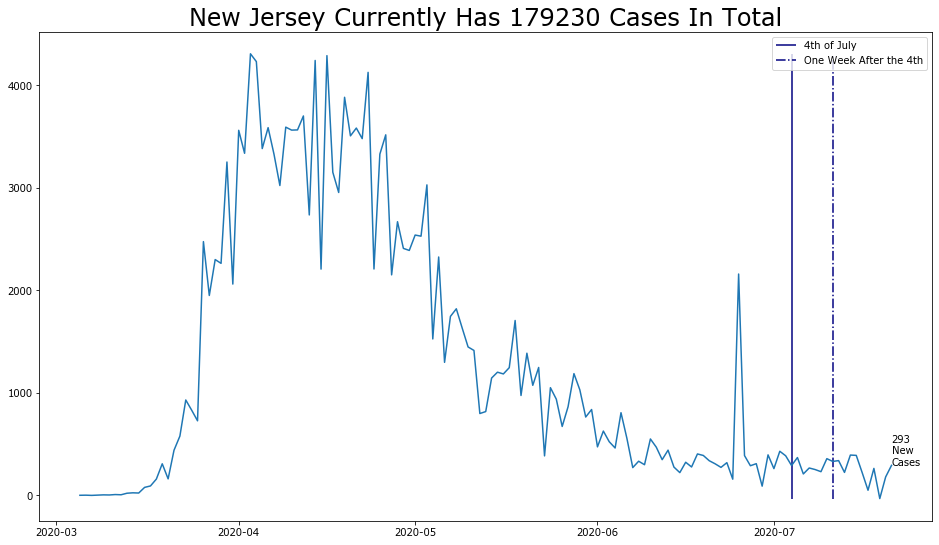

In [53]:
daily_change(new_jersey_data)

## New Mexico (NM)

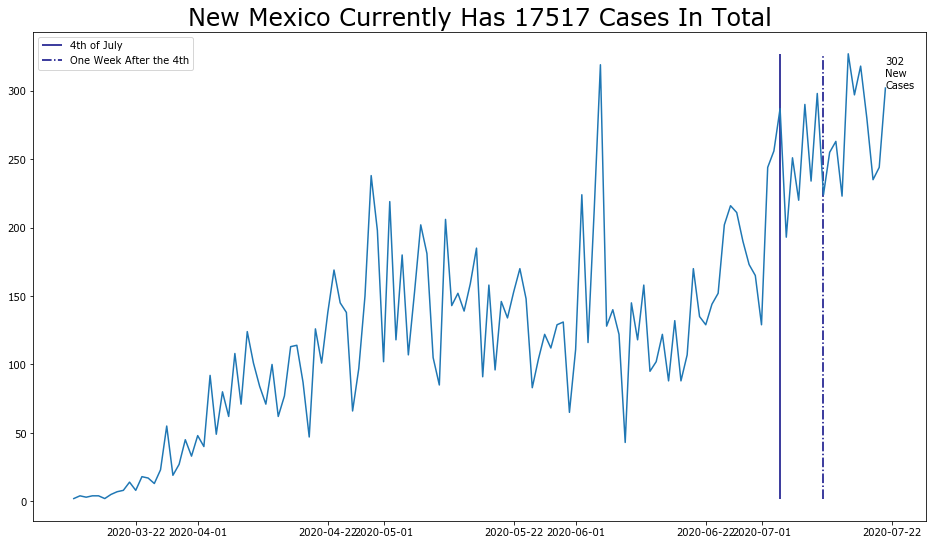

In [54]:
daily_change(new_mexico_data)

## New York (NY)

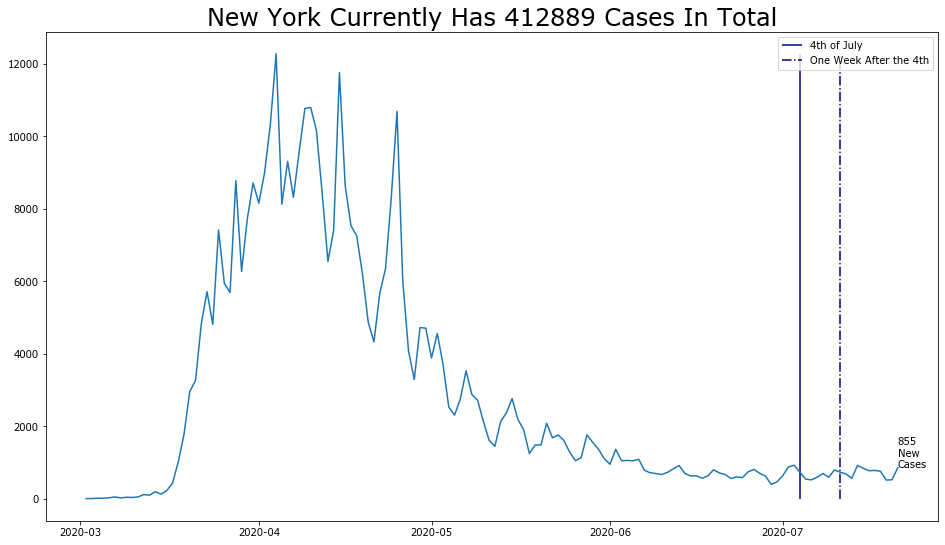

In [55]:
daily_change(new_york_data)

## North Carolina (NC)

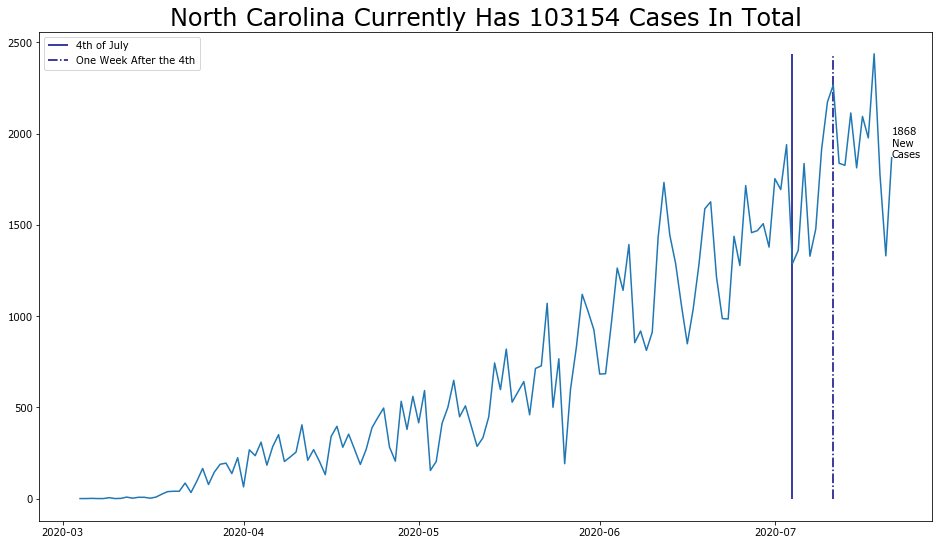

In [56]:
daily_change(north_carolina_data)

## North Dakota (ND)

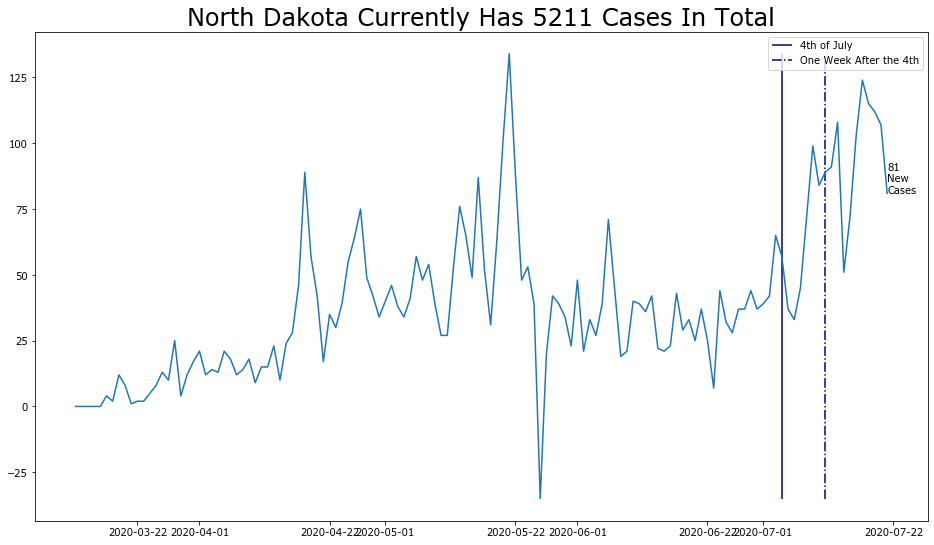

In [57]:
daily_change(north_dakota_data)

## Northern Mariana Islands (MP)

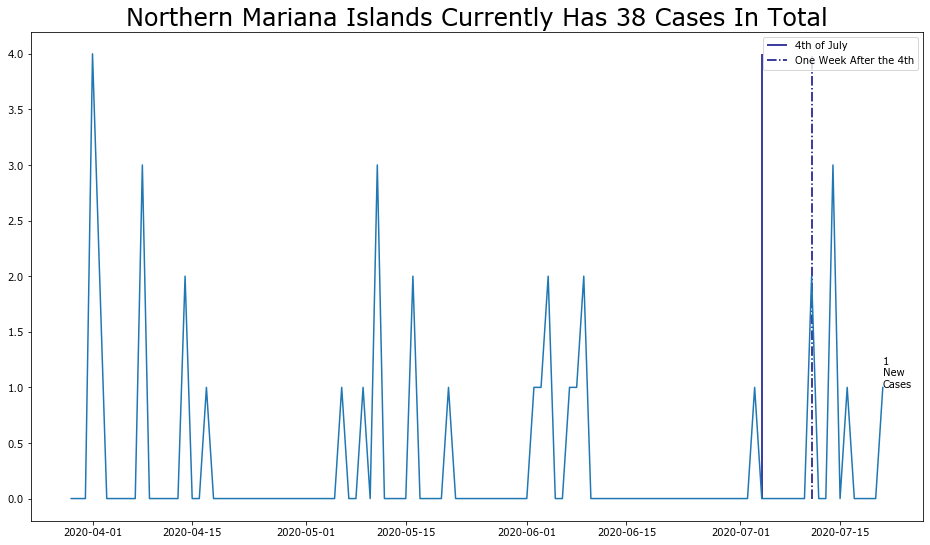

In [58]:
daily_change(north_mariana_islands_data)

## Ohio (OH)

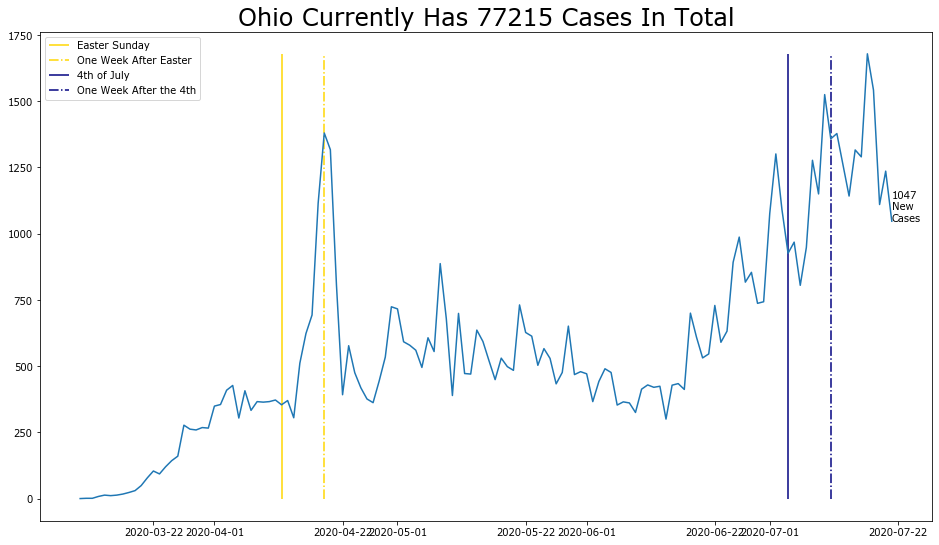

In [59]:
daily_change(ohio_data, easter='Oh Oh')

## Oklahoma (OK)

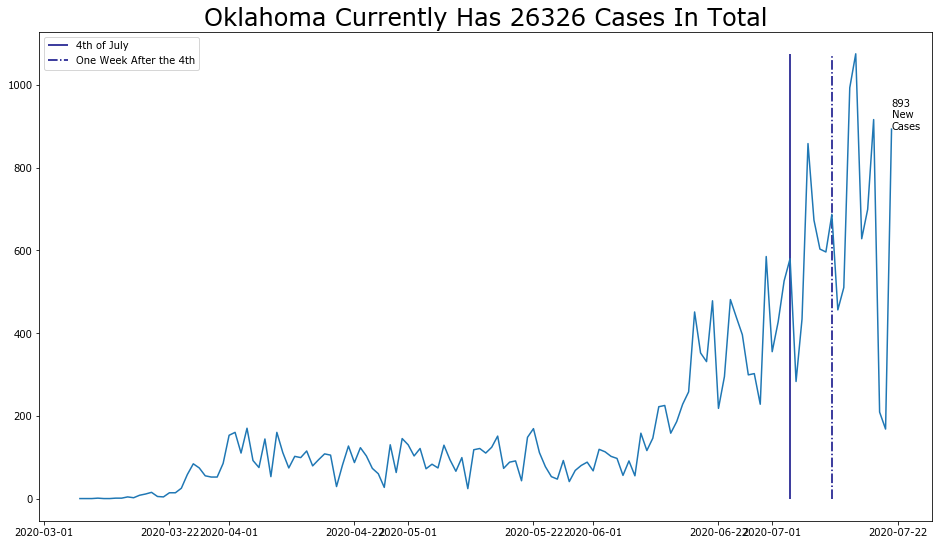

In [60]:
daily_change(oklahoma_data)

## Oregon (OR)

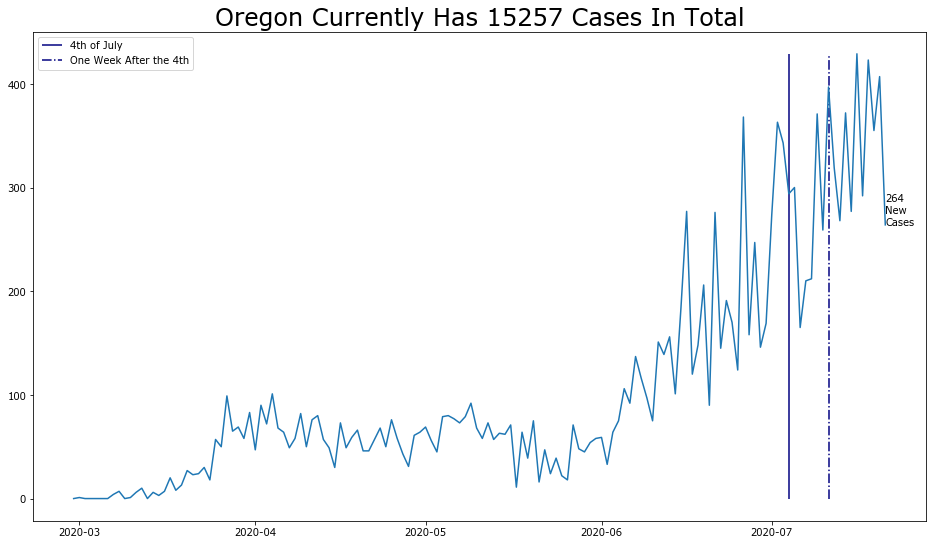

In [61]:
daily_change(oregon_data)

## Pennsylvania (PA)

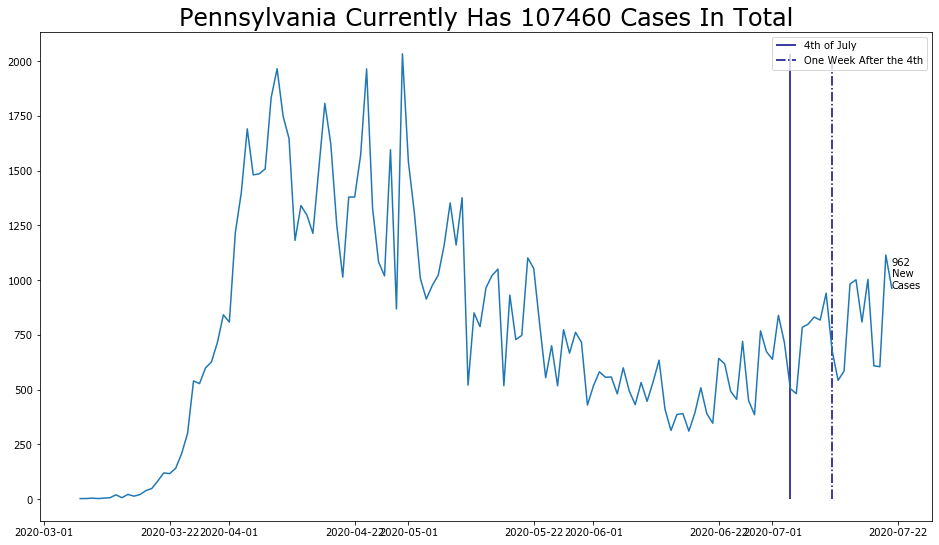

In [62]:
daily_change(pennsylvania_data)

## Puerto Rico (PR)

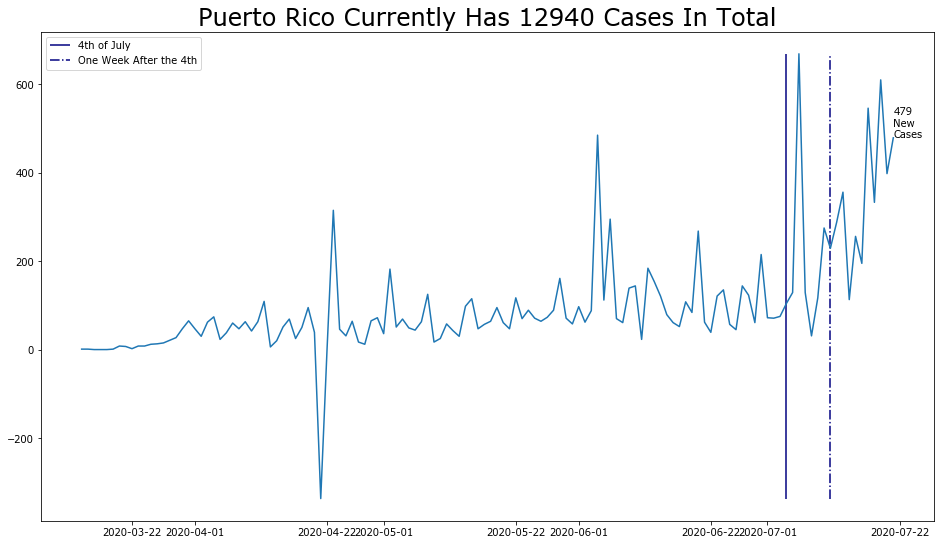

In [63]:
daily_change(puerto_rico_data)

## Rhode Island (RI)

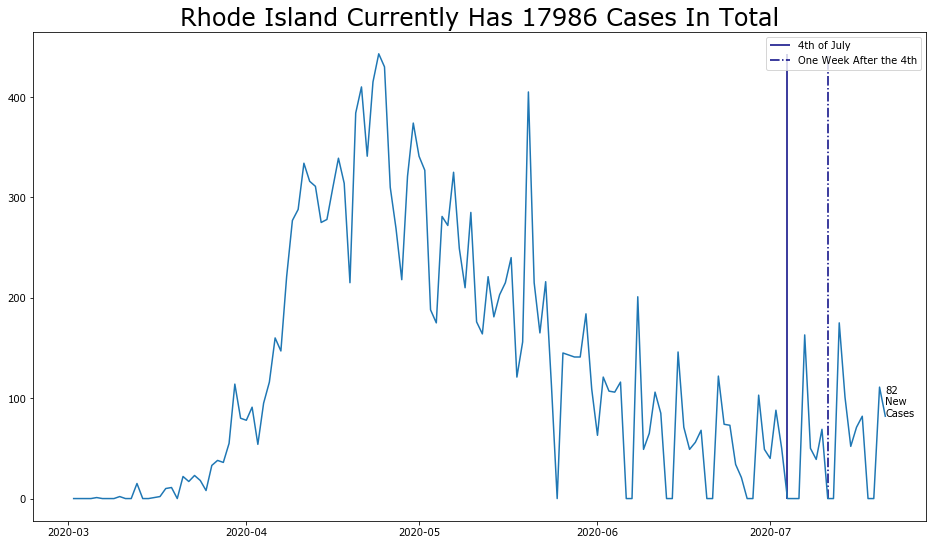

In [64]:
daily_change(rhode_island_data)

## South Carolina (SC)

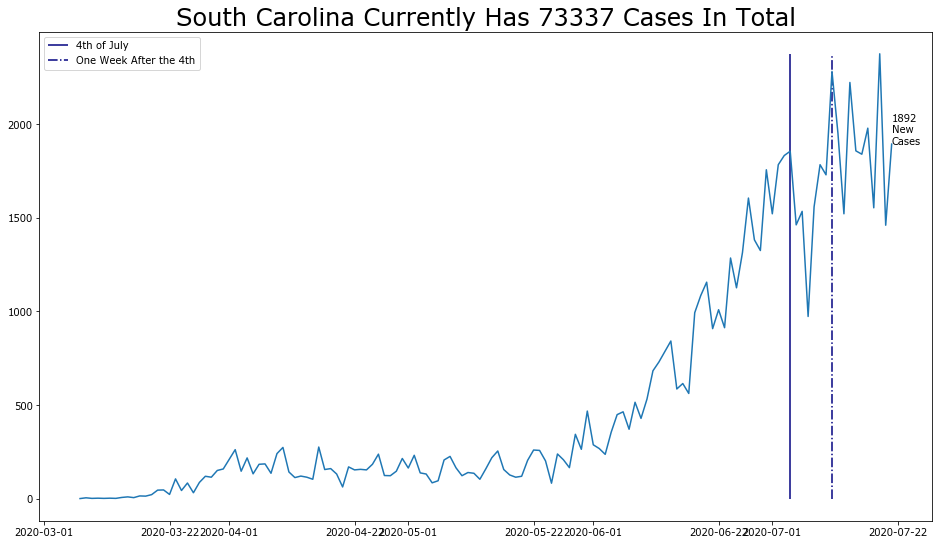

In [65]:
daily_change(south_carolina_data)

## South Dakota (SD)

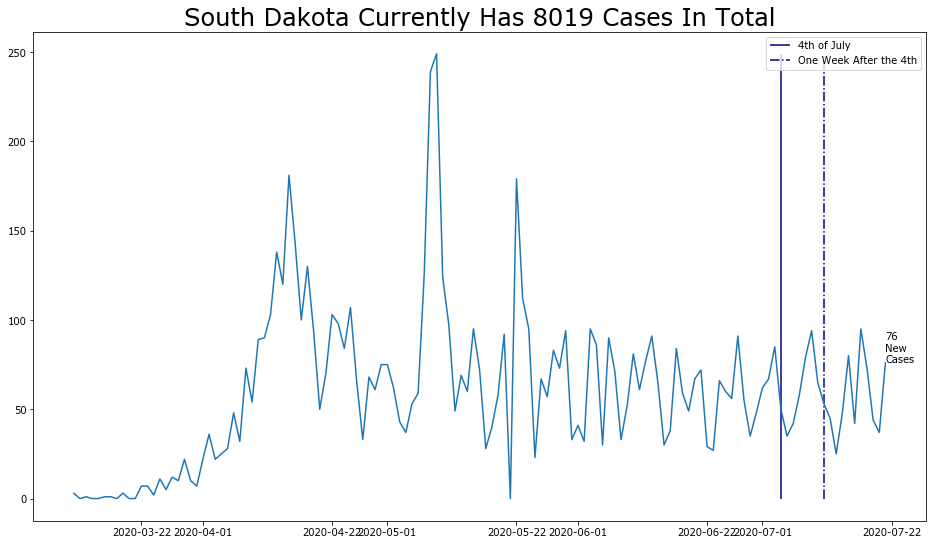

In [66]:
daily_change(south_dakota_data)

## Tennessee (TN)

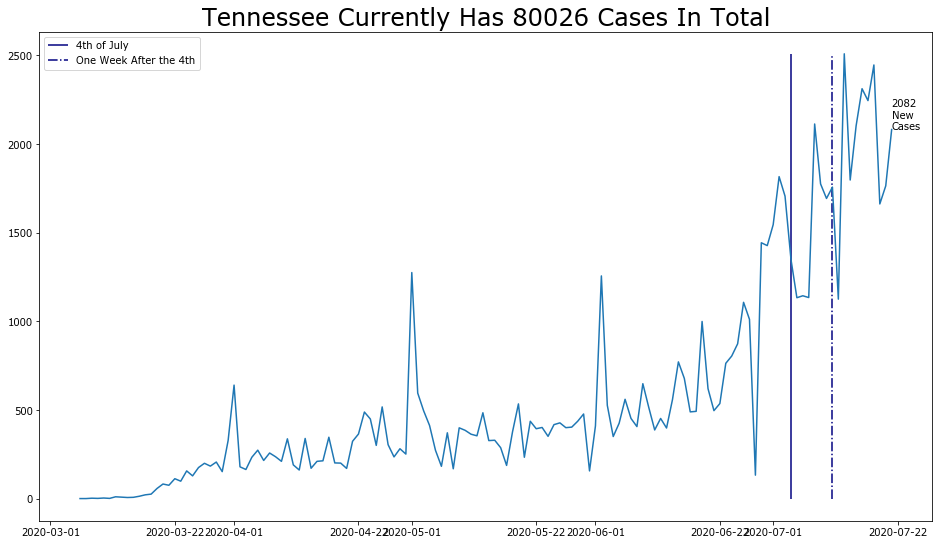

In [67]:
daily_change(tennessee_data)

## Texas (TX)

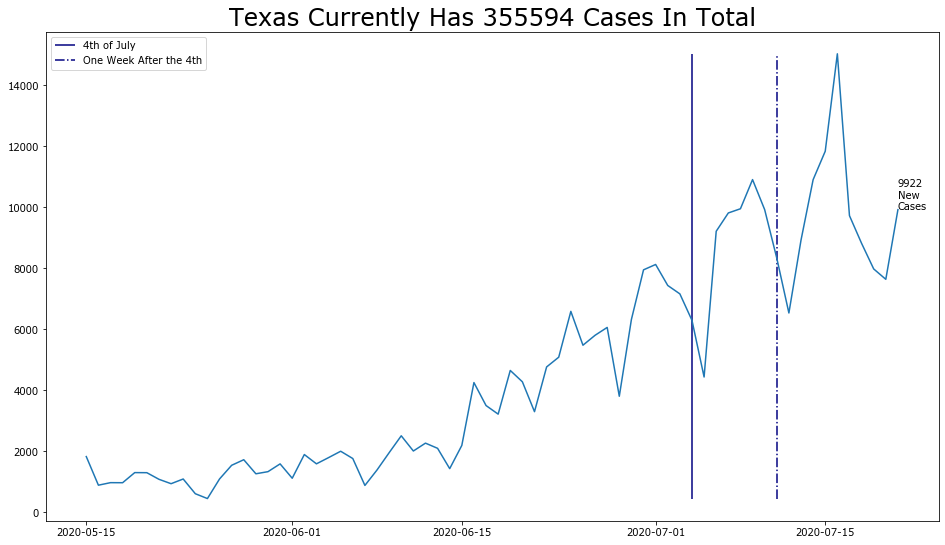

In [88]:
daily_change(texas_data[dt.date(2020, 5, 15):])

## Utah (UT)

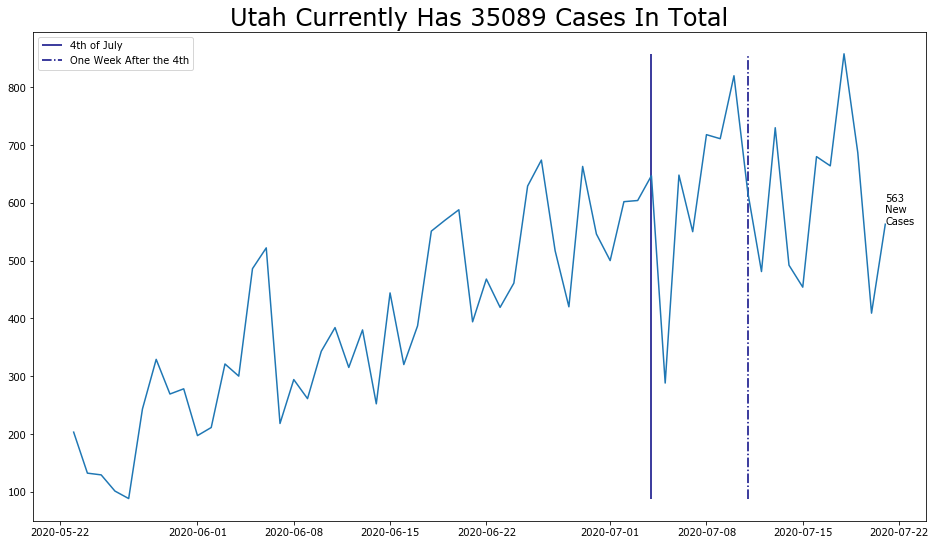

In [69]:
daily_change(utah_data[-60:])

## Vermont (VT)

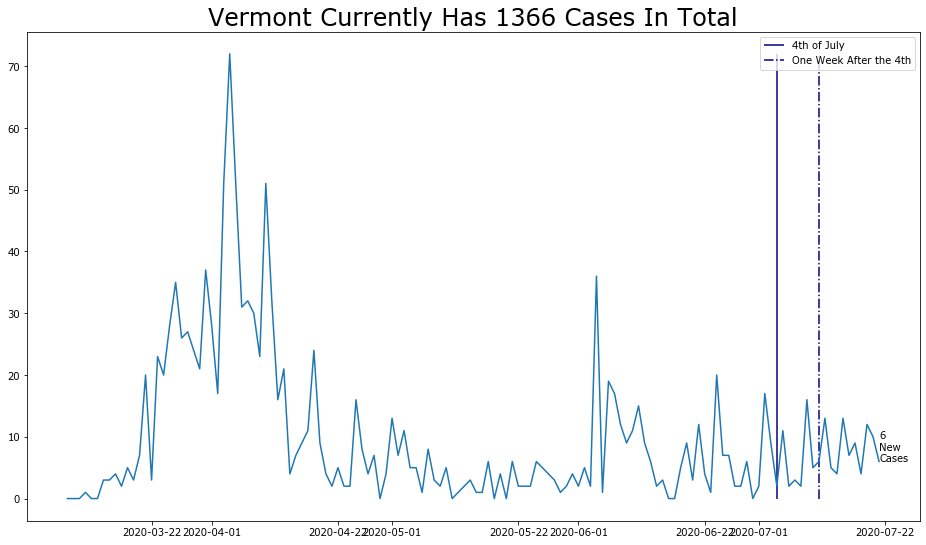

In [70]:
daily_change(vermont_data)

## Virgin Islands (VI)

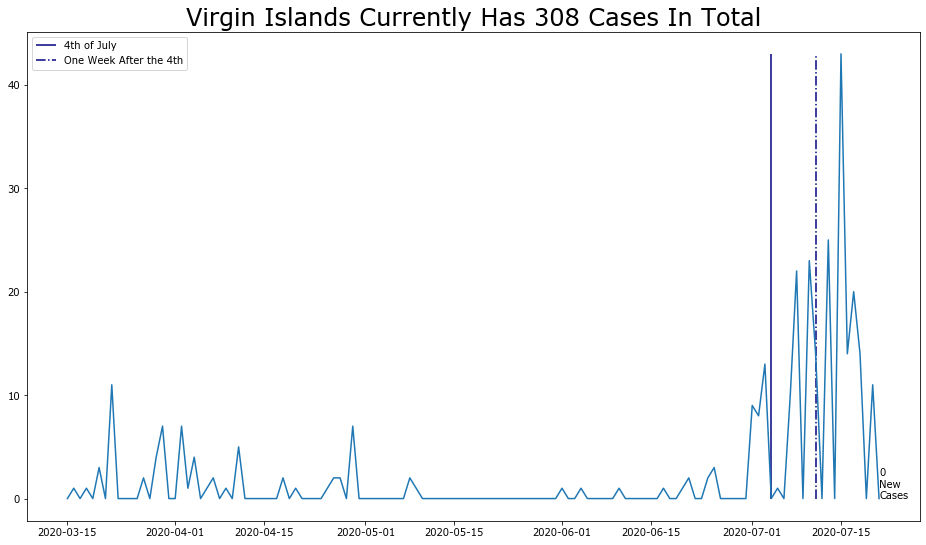

In [71]:
daily_change(virgin_islands_data)

## Virginia (VA)

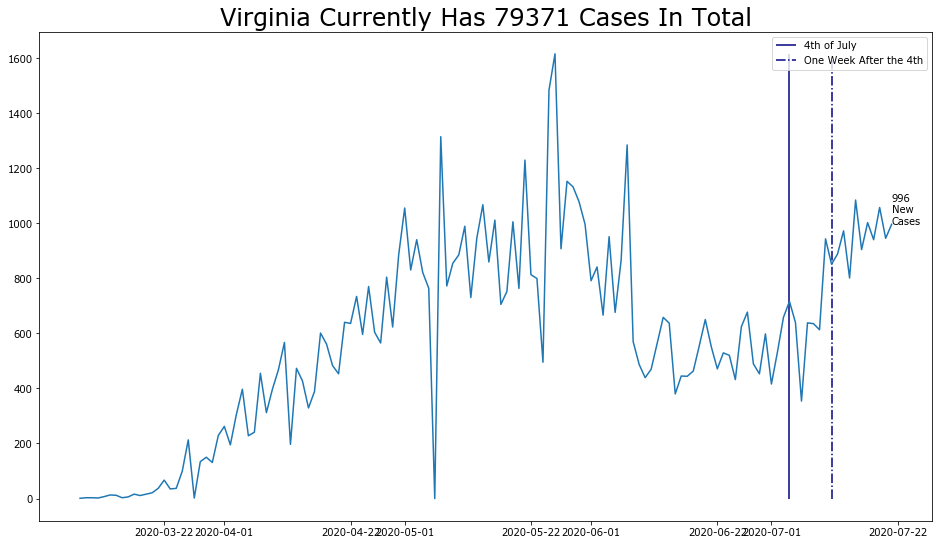

In [72]:
daily_change(virginia_data)

## Washington (WA)

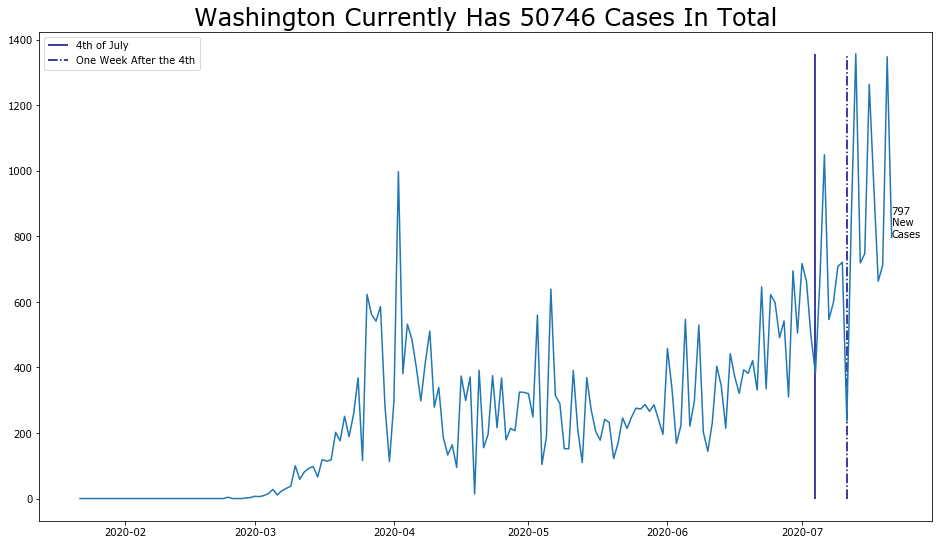

In [73]:
daily_change(washington_data)

## West Virginia (WV)

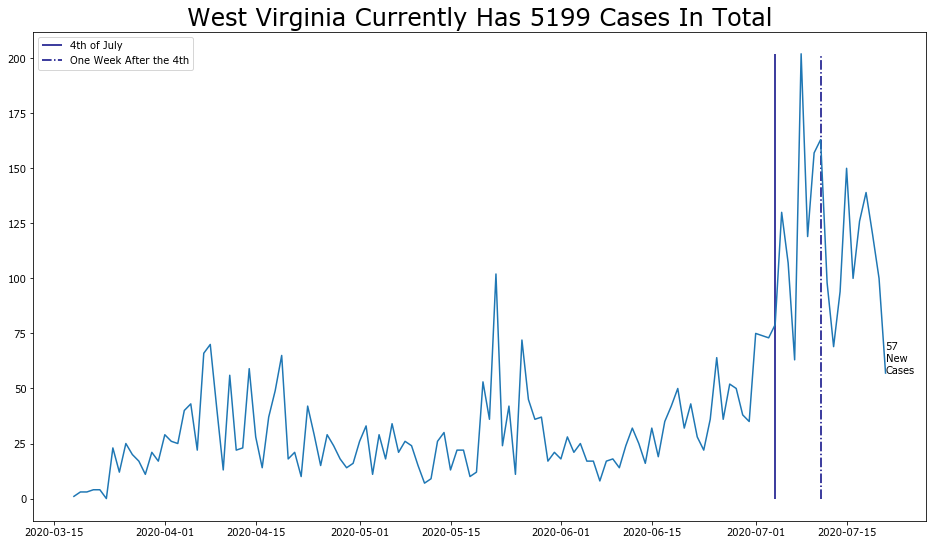

In [74]:
daily_change(west_virginia_data)

## Wisconsin (WI)

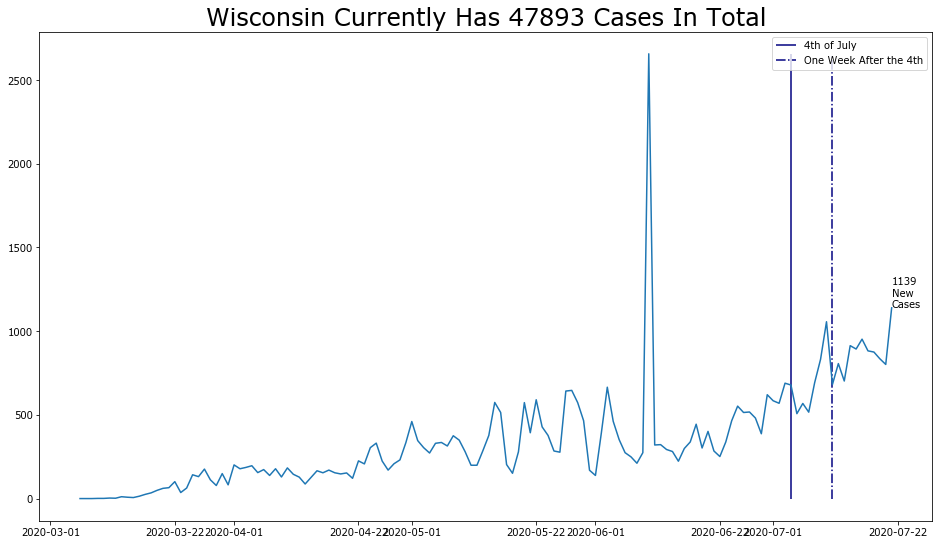

In [79]:
daily_change(wisconsin_data[30:])
# plt.vlines(x=dt.date(2020, 5, 13), ymin=wisconsin_data['change_in_cases'].min(), ymax=wisconsin_data['change_in_cases'].max(), color='red', label='Stay At Home Order Overturned')
# plt.vlines(x=dt.date(2020, 5, 20), ymin=wisconsin_data['change_in_cases'].min(), ymax=wisconsin_data['change_in_cases'].max(), linestyle='dashdot', color='red', label='One Week After Overturn')
plt.legend();

## Wyoming (WY)

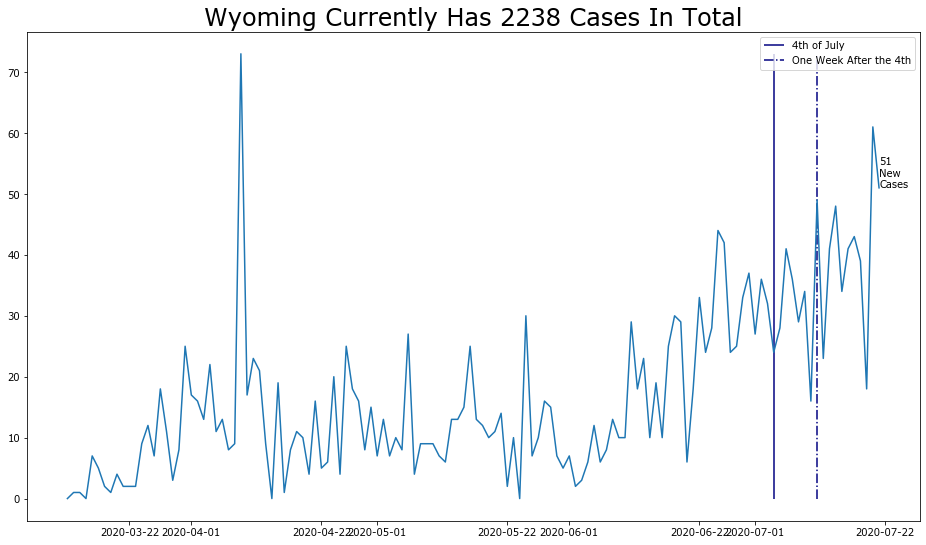

In [76]:
daily_change(wyoming_data)

In [77]:
massachusetts_data.tail(10)

state  fips   cases  deaths  percent_change  \
date                                                              
2020-07-12  Massachusetts    25  111597    8325        0.001786   
2020-07-13  Massachusetts    25  111827    8330        0.002061   
2020-07-14  Massachusetts    25  112130    8340        0.002710   
2020-07-15  Massachusetts    25  112347    8368        0.001935   
2020-07-16  Massachusetts    25  112581    8380        0.002083   
2020-07-17  Massachusetts    25  112879    8402        0.002647   
2020-07-18  Massachusetts    25  113238    8419        0.003180   
2020-07-19  Massachusetts    25  113534    8431        0.002614   
2020-07-20  Massachusetts    25  113789    8433        0.002246   
2020-07-21  Massachusetts    25  114033    8450        0.002144   

            change_in_cases  
date                         
2020-07-12            199.0  
2020-07-13            230.0  
2020-07-14            303.0  
2020-07-15            217.0  
2020-07-16            234.0  
2020-07-17            298.0  
2020-07-18            359.0  
2020-07-19            296.0  
2020-07-20            255.0  
2020-07-21            244.0

## States with Most Cases

In [78]:
total_us_data.groupby(total_us_data.state).last().sort_values(by='cases', ascending=False)

date  fips   cases  deaths  percent_change  \
state                                                                       
New York                 2020-07-21    36  412889   32218        0.002075   
California               2020-07-21     6  410366    7883        0.025415   
Florida                  2020-07-21    12  369826    5205        0.026194   
Texas                    2020-07-21    48  355594    4319        0.028704   
New Jersey               2020-07-21    34  179230   15737        0.001637   
Illinois                 2020-07-21    17  165534    7521        0.007977   
Arizona                  2020-07-21     4  148730    2918        0.023465   
Georgia                  2020-07-21    13  135865    3186        0.023172   
Massachusetts            2020-07-21    25  114033    8450        0.002144   
Pennsylvania             2020-07-21    42  107460    7094        0.009033   
North Carolina           2020-07-21    37  103154    1702        0.018443   
Louisiana                2020-07-21    22   96693    3608        0.017800   
Michigan                 2020-07-21    26   83184    6385        0.008462   
Maryland                 2020-07-21    24   80111    3402        0.010852   
Tennessee                2020-07-21    47   80026     863        0.026711   
Virginia                 2020-07-21    51   79371    2048        0.012708   
Ohio                     2020-07-21    39   77215    3219        0.013746   
South Carolina           2020-07-21    45   73337    1221        0.026482   
Alabama                  2020-07-21     1   70358    1303        0.021295   
Indiana                  2020-07-21    18   59344    2846        0.012575   
Washington               2020-07-21    53   50746    1531        0.015956   
Connecticut              2020-07-21     9   48096    4406        0.000853   
Wisconsin                2020-07-21    55   47893     868        0.024362   
Minnesota                2020-07-21    27   47497    1588        0.007424   
Mississippi              2020-07-21    28   45524    1389        0.037253   
Colorado                 2020-07-21     8   41152    1764        0.012374   
Iowa                     2020-07-21    19   39721     808        0.009608   
Nevada                   2020-07-21    32   37605     680        0.021736   
Missouri                 2020-07-21    29   37248    1175        0.033289   
Utah                     2020-07-21    49   35089     255        0.016307   
Arkansas                 2020-07-21     5   34655     374        0.021458   
Oklahoma                 2020-07-21    40   26326     461        0.035112   
Kentucky                 2020-07-21    21   24638     695        0.027525   
Kansas                   2020-07-21    20   23606     319        0.002633   
Nebraska                 2020-07-21    31   23190     313        0.015013   
Rhode Island             2020-07-21    44   17986     996        0.004580   
New Mexico               2020-07-21    35   17517     588        0.017543   
Idaho                    2020-07-21    16   15899     127        0.033745   
Oregon                   2020-07-21    41   15257     272        0.017608   
Delaware                 2020-07-21    10   13746     525        0.008955   
Puerto Rico              2020-07-21    72   12940     180        0.038440   
District of Columbia     2020-07-21    11   11427     580        0.007761   
South Dakota             2020-07-21    46    8019     118        0.009568   
New Hampshire            2020-07-21    33    6262     400        0.002080   
North Dakota             2020-07-21    38    5211      98        0.015789   
West Virginia            2020-07-21    54    5199     101        0.011085   
Maine                    2020-07-21    23    3723     118        0.003234   
Montana                  2020-07-21    30    2741      40        0.038258   
Alaska                   2020-07-21     2    2523      16        0.046020   
Wyoming                  2020-07-21    56    2238      25        0.023320   
Hawaii                   20